# Notebook 3: Develop LSTM Model

In Notebook 2, it has labeled the sentiment "positive, negative and neutral" to the standardised sentences which was extracted from 30 UK retailers annual report (pdf file). In addition, the label of these three sentiment has been converted to numeric value which positive is 1, negative is -1, and neutral is 0 respectively.


In this notebook, first, it will tokenize and pad the sentences into sequences. And then, it will develop different LSTM models by Tensorflow and Keras.

# Tokenization and padding sequences

In [1]:
# read the csv file which stores sentence and numeric labels
import pandas as pd
df_sent_lab = pd.read_csv("dataset/sen_with_numeric_labels.csv")
df_sent_lab.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,sentences,labels
0,mothercare plc annual report accounts www,0
1,mothercareplc,0
2,com transformation growth,0
3,financial highlights worldwide network sales,0
4,group sales,0


In [2]:
# a short summary of the dataset "df_sent_lab"
sentcount = df_sent_lab["labels"].value_counts()
print("Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):")
print(sentcount)
print(f"\nIs there any missing and null value? Answer: {sentcount.isnull().sum()}")

Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):
labels
 1    396692
 0    301895
-1    205911
Name: count, dtype: int64

Is there any missing and null value? Answer: 0


After the above inital screening, it can tokenize the sentences and pad them as sequences.

In [3]:
# Import global nlp functions to tokenize the sentences and pad them as sequences
from nlp_functions import tokenize_pad_sequences

# Global parameters
num_words = 500 # max numbers of vocabulary 
oov_token = '<OOV>' # words that is out of the vocabulary
maxlen = 10 # max length of the sequences
padding = 'post' # padding position
truncating = 'post' # truncation position

# Extract the sentence from the dataset "df_sent_lab"
sentences = df_sent_lab["sentences"]

In [4]:
# Tokenize and padded the sentences
tokenizer, word_index, sequences, padded_sequences = tokenize_pad_sequences(sentences, 
                                                                            num_words, 
                                                                            oov_token, 
                                                                            maxlen,
                                                                            padding, 
                                                                            truncating)

2023-07-12 15:08:54.543722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using the global nlp function to visualise the padded sequences.

In [5]:
# Import global nlp functions for the summary
from nlp_functions import summary_tokpad

# Get the summary of the padded and tokenization for first 10 rows
summary = tokenize_pad_sequences(sentences, num_words, oov_token, maxlen, padding, truncating)
summary_tokpad(summary, 0, 10)

start index: 0
end index: 10
Summary of the tokenization and padding:

Selected Word Index:
<OOV>: 1
group: 2
financial: 3
year: 4
report: 5
company: 6
committee: 7
board: 8
directors: 9
business: 10

Selected Sentences:
[1, 25, 11, 5, 36, 1]
[1]
[395, 1, 81]
[3, 1, 1, 1, 57]
[2, 57]
[62, 253]
[26, 62, 71]
[166, 1]
[253]
[61, 223, 4, 249, 62, 253]

Selected Padded Sequences:
[ 1 25 11  5 36  1  0  0  0  0]
[1 0 0 0 0 0 0 0 0 0]
[395   1  81   0   0   0   0   0   0   0]
[ 3  1  1  1 57  0  0  0  0  0]
[ 2 57  0  0  0  0  0  0  0  0]
[ 62 253   0   0   0   0   0   0   0   0]
[26 62 71  0  0  0  0  0  0  0]
[166   1   0   0   0   0   0   0   0   0]
[253   0   0   0   0   0   0   0   0   0]
[ 61 223   4 249  62 253   0   0   0   0]


# Spliting the dataset

Split the dataset into X_training, X_test, Y_training and Y_test for modelling and validation. 
In details, X_training is training_sequences, X_test is testing_sequences, Y_training is training_labels, Y_test is testing_labels, respectively.

First, it splits the training sequences and testing sequences.

In [6]:
# parameters setting
training_size = 0.8
labels = df_sent_lab["labels"]
sequences = padded_sequences

# Split the sequences into training and testing dataset
from nlp_functions import split_the_dataset
training_sequences, testing_sequences = split_the_dataset(sequences, training_size)

In [7]:
# Print the training sequences dataset
print(f"There are {len(training_sequences)} in the training sequences data.")
print("The following are the training sequences: ")
print(training_sequences)

# Print the testing sequences dataset
print("")
print("")
print(f"There are {len(testing_sequences)} in the testing sequences data.")
print("The following are the testing sequences: ")
print(testing_sequences)

There are 723598 in the training sequences data.
The following are the training sequences: 
[[329   1   1 ... 207 208  22]
 [  1   1   1 ...   1   1   1]
 [ 74  78   1 ...  78   1 203]
 ...
 [ 50   1   1 ...   1   0   0]
 [126 238   1 ...   1   1  45]
 [  1   5 381 ...   0   0   0]]


There are 180900 in the testing sequences data.
The following are the testing sequences: 
[[128   0   0 ...   0   0   0]
 [249 188  19 ...  50 190 273]
 [  1   1   1 ...  23   1  16]
 ...
 [  1   1 201 ...  48   1   1]
 [  1   1   1 ...   1   1 214]
 [ 20  14  90 ...   0   0   0]]


Next, it splits the training lables and testing labels datasets.

In [8]:
# Split the labels into training and testing dataset
training_labels, testing_labels = split_the_dataset(labels, training_size)

In [9]:
# Print the training labels dataset
print(f"There are {len(training_labels)} in the training labels data.")
print("The following are the training labels: ")
print(training_labels)

# Print the testing labels dataset
print("")
print("")
print(f"There are {len(testing_labels)} in the testing labels data.")
print("The following are the testing labels: ")
print(testing_labels)

There are 723598 in the training labels data.
The following are the training labels: 
145206    1
488489    1
333331    1
658478    0
700643    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    0
Name: labels, Length: 723598, dtype: int64


There are 180900 in the testing labels data.
The following are the testing labels: 
347497    0
840078    1
289955   -1
861028    1
901240    1
         ..
758540    1
7624     -1
313781    1
476891    1
240607    1
Name: labels, Length: 180900, dtype: int64


Before developing models, it sets up a global function to visualise the validation during the training and validation process.

In [10]:
import matplotlib.pyplot as plt

# Plot functions
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# LSTM Model

LSTM, the Long Short-Term Memoary model is one of the sequential models widely used in NLP. It is a variant of recurrent neural network and it is used to process input data in a sequential manner. In NLP, the input sequence can be sentences or paragraph. In details, LSTM can prcess each element of the input seuqnces at a time, and then it maintains an internal memory state that can capture and retain relevant informtion over time. This feature allows LSTM to handle varuing lengths and capture long term dependencies during sentiment analysis.

In addition, LSTM model is slower to train but it can capture the order of the tokens. In sentiment analysis on financial risk, LSTM can capture the temporal dependencies that allows the model to understand the evolution of sentiment over time. Also, it can capture contextual information in paragraph. Sometimes, the sentiment of the sentences can be influenced by preceding sentences. LSTM can incorporate the paragraph or reporting context into the process.

1. Embedding Layer: An input layer, converting the input into dense vectors, the numeric representative of the sentences. It specifiy num_words which is the total number of freqeuent/unique words from the dataset. embedding)dim specifies the dimentionaly of the word embeddings. input length specifies the length of the input sequences, that is usually the maximum sequence length in the dataset.

2. Bidirectional LSTM layer: The bidirectional wrapper allows the LSTM layer to process input sequenences in both forward and backward directions, capturing contextual information from past and future words. lstm_dim means the number of LSTM units in each direction to determines the capacity and complextity of LSTM layer. It is common to use bidirectional LSTM layer in NLP because language is seuqential and the meanding of word can be affected by surrounding words. It gives the model to capture the contextual information. 

3. Dense layer (intermediate layer): Transforming the preceding layer to non-linearity (if use ReLU activation) before the output layer. It can be seen as a linear transformation of the LSTM layer output.

4. Dense layer (output layer): different activation function can generate different number of output. For sigmoid activation, it produce a signle output value between 0 and 1. Since there are 3 sentiment label classification, it will use softmax activation instead.

5. Loss function: measure of model performance, quantifying the discrepancy between predicted output and actual output.

6. Optimizer: determines how the model's weight are being updated. adam is popular optimizer due to faster convergence and improved performance.

7. metrics: performance evaluation. accuracy calcluate the percentage of correct prediction. 

## 1st LSTM model

In [11]:
# Hyperparameters
embedding_dim = 10 # each word will be represented by a dense vector of specified size
lstm_dim = 12 # number of LSTM units
dense_dim = 12 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential

Before specify the model definition, it should covert the label as one-hot encoded format. It can work with categorical_crossentropy loss function as this function only read labels at one-hot encoded format and it cannot process any negative value.

One-hot encoding: It is a process of converting the numeric categorical variables as binary vectors as follows:

-1 = [1,0,0]  
0 = [0,1,0]  
1 = [0,0,1]
. 

In [13]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
training_labels_encoded = to_categorical(training_labels, num_classes=3)
testing_labels_encoded = to_categorical(testing_labels, num_classes=3)

In [44]:
# Build the model
lstm_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
lstm_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
lstm_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 10)            5000      
                                                                 
 bidirectional_3 (Bidirectio  (None, 24)               2208      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 3)                 39        
                                                                 
Total params: 7,547
Trainable params: 7,547
Non-trainable params: 0
_________________________________________________________________


Since it is processing the complicated dataset and model arhcitecture, it specify 30 epochs and 128 batch size to capture complexity while minising the computational consumption.

In [14]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

lstm_model_1 = lstm_model_1.fit(training_sequences, training_labels_encoded, 
                    epochs=NUM_EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data=(testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 25s 4ms/step - loss: 0.5299 - accuracy: 0.7533 - val_loss: 0.5082 - val_accuracy: 0.7576
Epoch 2/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.5001 - accuracy: 0.7649 - val_loss: 0.4999 - val_accuracy: 0.7650
Epoch 3/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4938 - accuracy: 0.7686 - val_loss: 0.4963 - val_accuracy: 0.7659
Epoch 4/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4892 - accuracy: 0.7713 - val_loss: 0.4914 - val_accuracy: 0.7684
Epoch 5/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4856 - accuracy: 0.7732 - val_loss: 0.4900 - val_accuracy: 0.7708
Epoch 6/30
5654/5654 [==============================] - 22s 4ms/step - loss: 0.4824 - accuracy: 0.7747 - val_loss: 0.4865 - val_accuracy: 0.7723
Epoch 7/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4800 - accuracy: 0.7768 - val_loss: 0.4860 - val_ac

Next, it visualises the training accuracy and loss over time after the model training.  

1. Training accuracy: Assessing the model performance accuracy on the training dataset. High accuracy means the model performs well on the training data itself.
2. Validation accuracy: Assessing the model performance on the validation dataset. High validation accuracy means the model performs well on unseen data.
3. Training loss: It can be defined as the measure of model performance fitting on the training data by assessing the discrepancy between predicted and actual value. It could be decreased gradually during the training process when the model is learning to fit the training data.
4. Validation loss: It can be defined as the measure of model generalizing the unseen data.

Overfitting assessment: To assess overfitting, the training loss should be decreasing gradually while the validation loss is increasing.

In [ ]:
# Plot the accuracy and results 
plot_graphs(lstm_model_1, "accuracy")
plot_graphs(lstm_model_1, "loss")

Comment: The model "lstm_model_1" has high training accuracy of 79.1% and validation accuracy of 78.3%. The total training time is approximate 352 seconds (around 6 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

## 2nd LSTM model

In [34]:
# Hyperparameters
embedding_dim = 24 # dim of dense vector of word representation
lstm_dim = 24 # nums of LSTM units
dense_dim = 24 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [38]:
# Build the model
lstm_model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_2.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 24)            12000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 48)               9408      
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 24)                1176      
                                                                 
 dense_13 (Dense)            (None, 3)                 75        
                                                                 
Total params: 22,659
Trainable params: 22,659
Non-trainable params: 0
_________________________________________________________________


In [39]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_2 = lstm_model_2.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 30s 5ms/step - loss: 0.5233 - accuracy: 0.7557 - val_loss: 0.5027 - val_accuracy: 0.7627
Epoch 2/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4946 - accuracy: 0.7681 - val_loss: 0.4929 - val_accuracy: 0.7676
Epoch 3/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4850 - accuracy: 0.7741 - val_loss: 0.4873 - val_accuracy: 0.7735
Epoch 4/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4773 - accuracy: 0.7792 - val_loss: 0.4807 - val_accuracy: 0.7760
Epoch 5/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4710 - accuracy: 0.7828 - val_loss: 0.4769 - val_accuracy: 0.7789
Epoch 6/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4648 - accuracy: 0.7868 - val_loss: 0.4743 - val_accuracy: 0.7806
Epoch 7/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4593 - accuracy: 0.7901 - val_loss: 0.4690 - val_ac

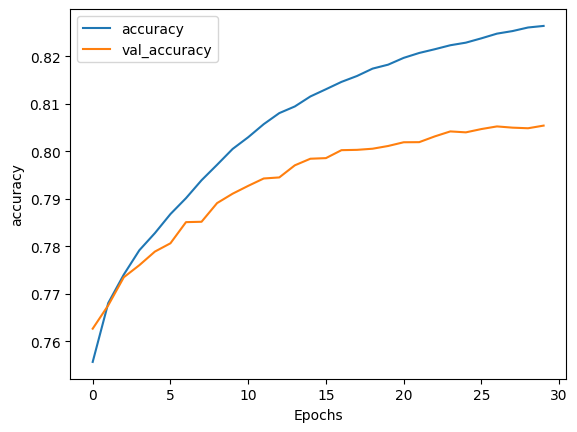

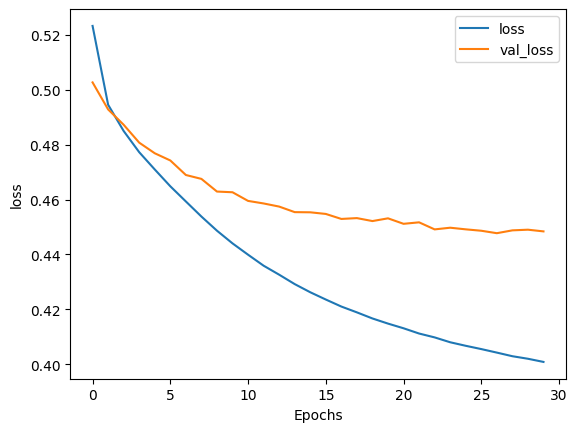

In [41]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_2, 'accuracy')
plot_graphs(lstm_model_2, 'loss')

Comment: The second LSTM model "lstm_model_2" has a slightly better training accuracy of 82.6% and validation accuracy of 80.5%. The total training time is approximate 716 seconds (around 11 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

## 3rd LSTM model

In [45]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 64 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [46]:
# Build the model
lstm_model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                                 
Total params: 106,499
Trainable params: 106,499
Non-trainable params: 0
_________________________________________________________________


In [47]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3 = lstm_model_3.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 56s 9ms/step - loss: 0.5142 - accuracy: 0.7586 - val_loss: 0.4954 - val_accuracy: 0.7668
Epoch 2/30
5654/5654 [==============================] - 53s 9ms/step - loss: 0.4865 - accuracy: 0.7721 - val_loss: 0.4829 - val_accuracy: 0.7743
Epoch 3/30
5654/5654 [==============================] - 53s 9ms/step - loss: 0.4717 - accuracy: 0.7817 - val_loss: 0.4708 - val_accuracy: 0.7826
Epoch 4/30
5654/5654 [==============================] - 53s 9ms/step - loss: 0.4569 - accuracy: 0.7913 - val_loss: 0.4615 - val_accuracy: 0.7887
Epoch 5/30
5654/5654 [==============================] - 53s 9ms/step - loss: 0.4406 - accuracy: 0.8014 - val_loss: 0.4510 - val_accuracy: 0.7967
Epoch 6/30
5654/5654 [==============================] - 53s 9ms/step - loss: 0.4243 - accuracy: 0.8113 - val_loss: 0.4427 - val_accuracy: 0.8034
Epoch 7/30
5654/5654 [==============================] - 53s 9ms/step - loss: 0.4084 - accuracy: 0.8207 - val_loss: 0.4341 - val_ac

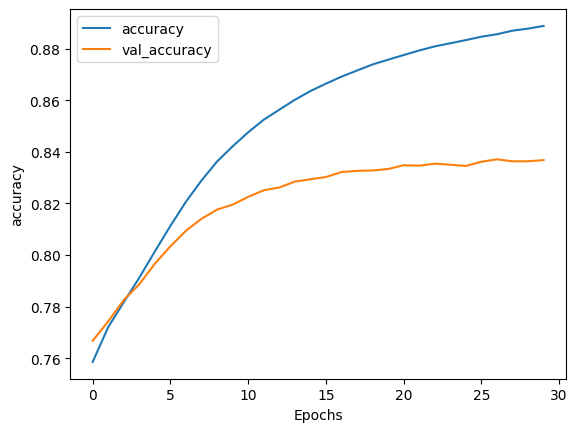

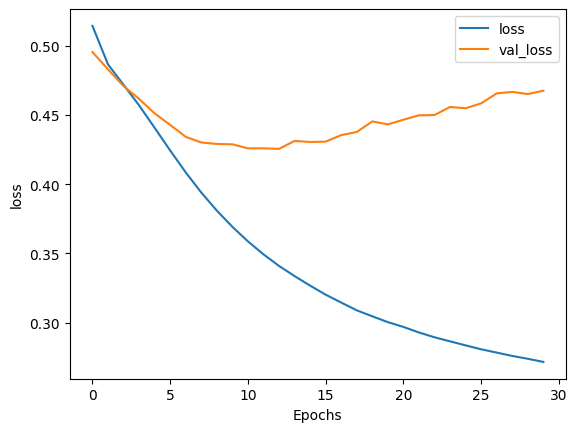

In [48]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3, 'accuracy')
plot_graphs(lstm_model_3, 'loss')

Comment: The third LSTM model "lstm_model_3" has a significantly better training accuracy of 88.9% and validation accuracy of 83.7%. The total training time is approximate 1612 seconds (around 26 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

## 4th LSTM model

In [58]:
# Hyperparameters
embedding_dim = 74 # dim of dense vector of word representation
lstm_dim = 74 # nums of LSTM units
dense_dim = 74 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [59]:
# Build the model
lstm_model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_4.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 74)            37000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 148)              88208     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 74)                11026     
                                                                 
 dense_19 (Dense)            (None, 3)                 225       
                                                                 
Total params: 136,459
Trainable params: 136,459
Non-trainable params: 0
_________________________________________________________________


In [60]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_4 = lstm_model_4.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 65s 11ms/step - loss: 0.5137 - accuracy: 0.7588 - val_loss: 0.4976 - val_accuracy: 0.7655
Epoch 2/30
5654/5654 [==============================] - 62s 11ms/step - loss: 0.4865 - accuracy: 0.7726 - val_loss: 0.4817 - val_accuracy: 0.7747
Epoch 3/30
5654/5654 [==============================] - 62s 11ms/step - loss: 0.4700 - accuracy: 0.7830 - val_loss: 0.4699 - val_accuracy: 0.7845
Epoch 4/30
5654/5654 [==============================] - 62s 11ms/step - loss: 0.4523 - accuracy: 0.7945 - val_loss: 0.4574 - val_accuracy: 0.7925
Epoch 5/30
5654/5654 [==============================] - 62s 11ms/step - loss: 0.4332 - accuracy: 0.8066 - val_loss: 0.4459 - val_accuracy: 0.8023
Epoch 6/30
5654/5654 [==============================] - 62s 11ms/step - loss: 0.4140 - accuracy: 0.8181 - val_loss: 0.4360 - val_accuracy: 0.8082
Epoch 7/30
5654/5654 [==============================] - 62s 11ms/step - loss: 0.3968 - accuracy: 0.8277 - val_loss: 0.4299 -

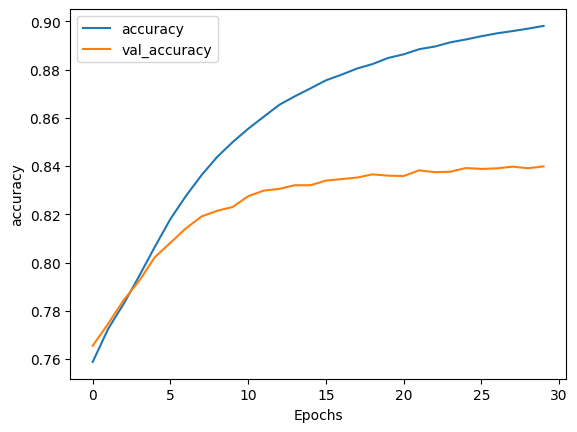

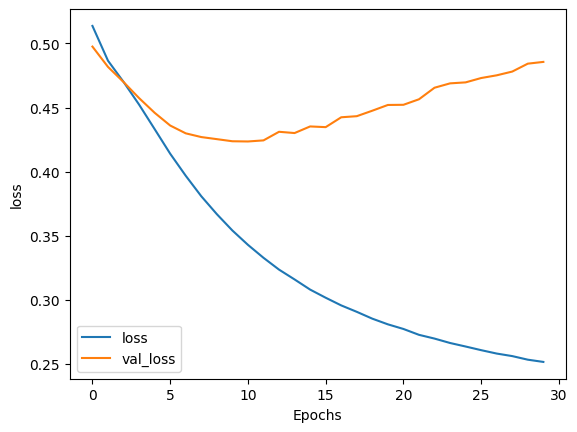

In [61]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_4, 'accuracy')
plot_graphs(lstm_model_4, 'loss')

Comment: The forth LSTM model "lstm_model_4" has a little enhancement of the training accuracy of 89.8% and validation accuracy of 83.9%. The total training time is approximate 1871 seconds (around 31 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

## 5th LSTM model

In [66]:
# Hyperparameters
embedding_dim = 108 # dim of dense vector of word representation
lstm_dim = 108 # nums of LSTM units
dense_dim = 108 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [67]:
# Build the model
lstm_model_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_5.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 108)           54000     
                                                                 
 bidirectional_8 (Bidirectio  (None, 216)              187488    
 nal)                                                            
                                                                 
 dense_22 (Dense)            (None, 108)               23436     
                                                                 
 dense_23 (Dense)            (None, 3)                 327       
                                                                 
Total params: 265,251
Trainable params: 265,251
Non-trainable params: 0
_________________________________________________________________


In [68]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_5 = lstm_model_5.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 95s 17ms/step - loss: 0.5108 - accuracy: 0.7604 - val_loss: 0.4941 - val_accuracy: 0.7678
Epoch 2/30
5654/5654 [==============================] - 94s 17ms/step - loss: 0.4813 - accuracy: 0.7758 - val_loss: 0.4790 - val_accuracy: 0.7781
Epoch 3/30
5654/5654 [==============================] - 99s 17ms/step - loss: 0.4596 - accuracy: 0.7899 - val_loss: 0.4579 - val_accuracy: 0.7928
Epoch 4/30
5654/5654 [==============================] - 100s 18ms/step - loss: 0.4332 - accuracy: 0.8061 - val_loss: 0.4398 - val_accuracy: 0.8053
Epoch 5/30
5654/5654 [==============================] - 96s 17ms/step - loss: 0.4058 - accuracy: 0.8224 - val_loss: 0.4280 - val_accuracy: 0.8138
Epoch 6/30
5654/5654 [==============================] - 99s 18ms/step - loss: 0.3807 - accuracy: 0.8363 - val_loss: 0.4185 - val_accuracy: 0.8214
Epoch 7/30
5654/5654 [==============================] - 91s 16ms/step - loss: 0.3584 - accuracy: 0.8477 - val_loss: 0.4148 

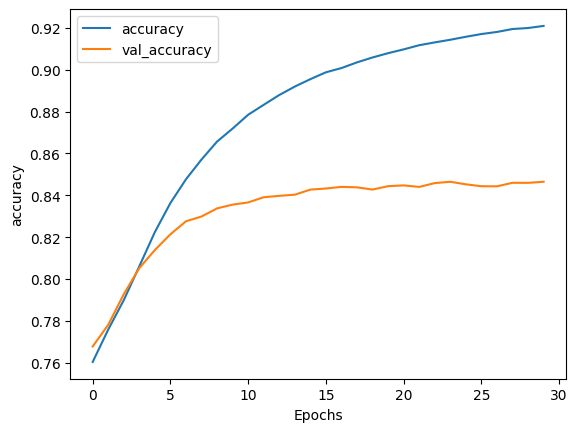

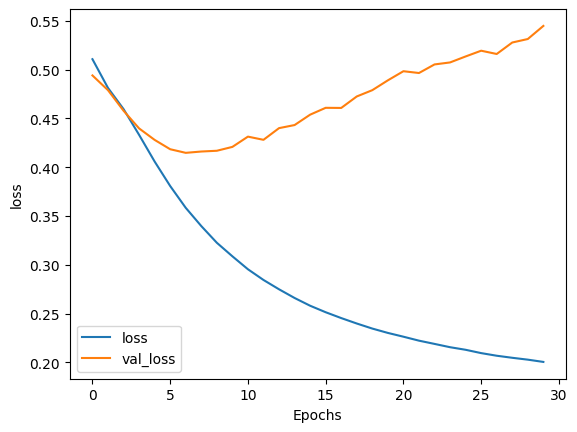

In [69]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_5, 'accuracy')
plot_graphs(lstm_model_5, 'loss')

Comment: The validation loss is increasing while the the training loss is lowering. The fifth model "lstm_model_5" is overfitted. 



# Model Optimization

The above model analysis of different LSTM models indicate that the thrid model "lstm_model_3" is highly accurately while it has lesser computational consumption. Next, it will create serveral models based on the hyperparameters of "lstm_model_3" model to figure out the best and faster LSTM models

First, it will adjust the list_dim hyperparameter.

## LSTM 3.1 model

In [70]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 54 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [71]:
# Build the model
lstm_model_3_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_1.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 64)            32000     
                                                                 
 bidirectional_9 (Bidirectio  (None, 108)              51408     
 nal)                                                            
                                                                 
 dense_24 (Dense)            (None, 64)                6976      
                                                                 
 dense_25 (Dense)            (None, 3)                 195       
                                                                 
Total params: 90,579
Trainable params: 90,579
Non-trainable params: 0
_________________________________________________________________


In [72]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_1 = lstm_model_3_1.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 52s 9ms/step - loss: 0.5146 - accuracy: 0.7584 - val_loss: 0.4982 - val_accuracy: 0.7654
Epoch 2/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4876 - accuracy: 0.7717 - val_loss: 0.4835 - val_accuracy: 0.7739
Epoch 3/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4734 - accuracy: 0.7803 - val_loss: 0.4730 - val_accuracy: 0.7817
Epoch 4/30
5654/5654 [==============================] - 49s 9ms/step - loss: 0.4588 - accuracy: 0.7900 - val_loss: 0.4632 - val_accuracy: 0.7878
Epoch 5/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.4437 - accuracy: 0.7996 - val_loss: 0.4540 - val_accuracy: 0.7943
Epoch 6/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.4288 - accuracy: 0.8089 - val_loss: 0.4453 - val_accuracy: 0.8015
Epoch 7/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.4146 - accuracy: 0.8175 - val_loss: 0.4402 - val_ac

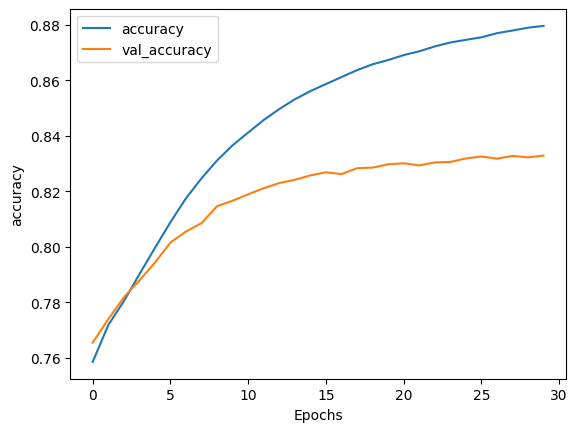

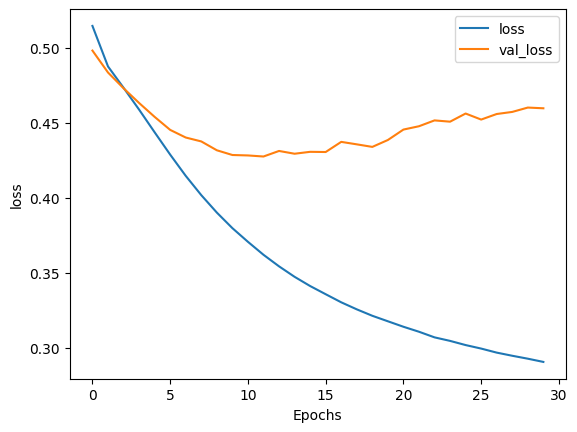

In [73]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_1, 'accuracy')
plot_graphs(lstm_model_3_1, 'loss')

Comment: The "lstm_model_3_1" has a training accuracy of 87.8% and validation accuracy of 83.3% that there is a similiar performance with the original thrid LSTM model lstm_model_3. The total training time is approximate 1450 seconds (around 24 mins) for 30 epochs and 128 batch size. It has less 2 mins than the lstm_model_3 which is 26 mins in total during the training. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

## LSTM 3.2 model

In [2]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 44 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [16]:
# Build the model
lstm_model_3_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_2.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_2.summary()

2023-07-11 15:10:27.060916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 10)            5000      
                                                                 
 bidirectional (Bidirectiona  (None, 24)               2208      
 l)                                                              
                                                                 
 dense (Dense)               (None, 12)                300       
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 7,547
Trainable params: 7,547
Non-trainable params: 0
_________________________________________________________________


In [17]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_2 = lstm_model_3_2.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 25s 4ms/step - loss: 0.5341 - accuracy: 0.7515 - val_loss: 0.5051 - val_accuracy: 0.7619
Epoch 2/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.5002 - accuracy: 0.7649 - val_loss: 0.5008 - val_accuracy: 0.7652
Epoch 3/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4942 - accuracy: 0.7682 - val_loss: 0.4958 - val_accuracy: 0.7672
Epoch 4/30
5654/5654 [==============================] - 24s 4ms/step - loss: 0.4897 - accuracy: 0.7712 - val_loss: 0.4916 - val_accuracy: 0.7692
Epoch 5/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4864 - accuracy: 0.7731 - val_loss: 0.4923 - val_accuracy: 0.7688
Epoch 6/30
5654/5654 [==============================] - 23s 4ms/step - loss: 0.4838 - accuracy: 0.7741 - val_loss: 0.4884 - val_accuracy: 0.7726
Epoch 7/30
5654/5654 [==============================] - 25s 4ms/step - loss: 0.4815 - accuracy: 0.7760 - val_loss: 0.4882 - val_ac

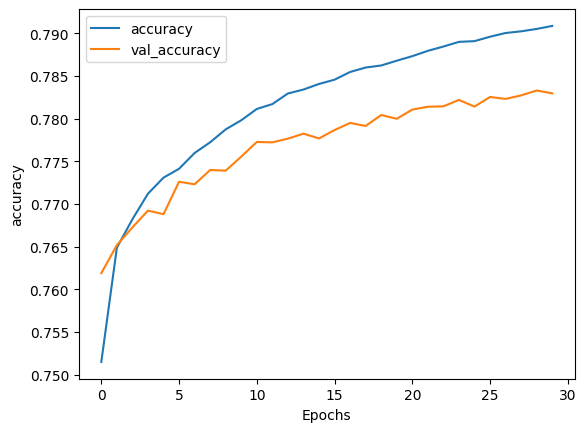

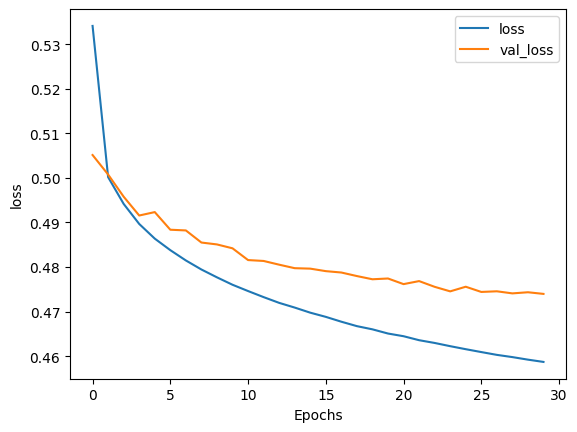

In [21]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_2, 'accuracy')
plot_graphs(lstm_model_3_2, 'loss')

Comment: The "lstm_model_3_2" model has a training accuracy of 79.1% and validation accuracy of 78.3%. It has a slight drop over the training performance. The total training time is approximate 695 seconds (around 11 mins) for 30 epochs and 128 batch size. Althoug it has fewer computational consumption and passed the validation test without overfitting, this model may not be deployed due to its lower accuracy.

## LSTM 3.3 model

In [45]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [46]:
# Build the model
lstm_model_3_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_3.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 68)               26928     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                4416      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 63,539
Trainable params: 63,539
Non-trainable params: 0
_________________________________________________________________


In [47]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_3 = lstm_model_3_3.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 37s 6ms/step - loss: 0.5136 - accuracy: 0.7590 - val_loss: 0.5015 - val_accuracy: 0.7649
Epoch 2/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.4875 - accuracy: 0.7724 - val_loss: 0.4818 - val_accuracy: 0.7755
Epoch 3/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.4732 - accuracy: 0.7813 - val_loss: 0.4727 - val_accuracy: 0.7817
Epoch 4/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.4602 - accuracy: 0.7889 - val_loss: 0.4626 - val_accuracy: 0.7883
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4476 - accuracy: 0.7971 - val_loss: 0.4564 - val_accuracy: 0.7925
Epoch 6/30
5654/5654 [==============================] - 37s 6ms/step - loss: 0.4354 - accuracy: 0.8048 - val_loss: 0.4494 - val_accuracy: 0.7979
Epoch 7/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.4245 - accuracy: 0.8115 - val_loss: 0.4450 - val_ac

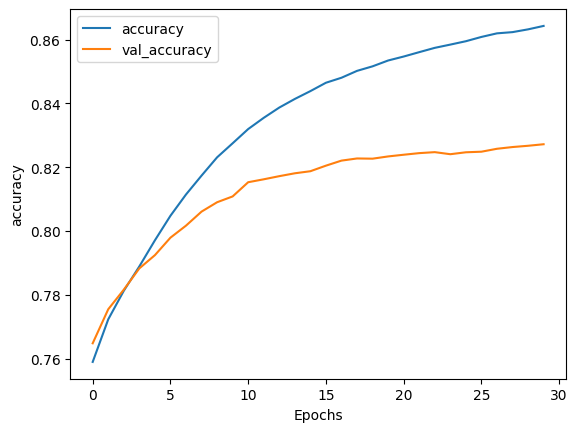

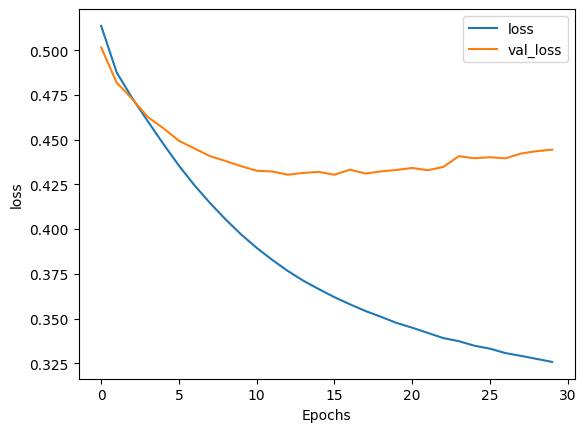

In [48]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_3, 'accuracy')
plot_graphs(lstm_model_3_3, 'loss')

Comment: The "lstm_model_3_3" has a training accuracy of 86.4% and validation accuracy of 82.7%, and the training time is approximate 1056 seconds (around 17 mins). Also, it can pass the validation test. By comparison, this model has a similiar performance whe previous LSTM model "lstm_model_3_1" but this model has fewer training time (lstm_model_3_1; trainning accuracy: 87.8% ; validation accuracy: 83.3% ; training time: 24 mins).  

The "lstm_model_3_3" models indicates that lstm_dim hyperparameter is 34 can be the fast and best model when the embedding_dim hyperparameter is 64 and dense_dim hyperparameter is 64. 


lstm_model_3_3's hyperparameter and training summary:
1. embedding_dim = 64
2. lstm_dim = 34 
3. dense_dim = 64 
4. Training accuracy = 86.4%
5. validation accuracy = 82.7%
6. Training time = 1056 seconds (around 17 mins)
7. validation test: PASS

Next. it will adjust the embedding_dim hyperparameter to find the best model.

## LSTM 3.4 model

In [67]:
# Hyperparameters
embedding_dim = 54 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [68]:
# Build the model
lstm_model_3_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_4.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 68)               24208     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                4416      
                                                                 
 dense_13 (Dense)            (None, 3)                 195       
                                                                 
Total params: 55,819
Trainable params: 55,819
Non-trainable params: 0
_________________________________________________________________


In [70]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_4 = lstm_model_3_4.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.5153 - accuracy: 0.7590 - val_loss: 0.4981 - val_accuracy: 0.7651
Epoch 2/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4886 - accuracy: 0.7714 - val_loss: 0.4861 - val_accuracy: 0.7734
Epoch 3/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4760 - accuracy: 0.7794 - val_loss: 0.4772 - val_accuracy: 0.7791
Epoch 4/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4645 - accuracy: 0.7863 - val_loss: 0.4688 - val_accuracy: 0.7842
Epoch 5/30
5654/5654 [==============================] - 37s 7ms/step - loss: 0.4532 - accuracy: 0.7936 - val_loss: 0.4622 - val_accuracy: 0.7896
Epoch 6/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.4425 - accuracy: 0.8003 - val_loss: 0.4558 - val_accuracy: 0.7941
Epoch 7/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.4321 - accuracy: 0.8071 - val_loss: 0.4497 - val_ac

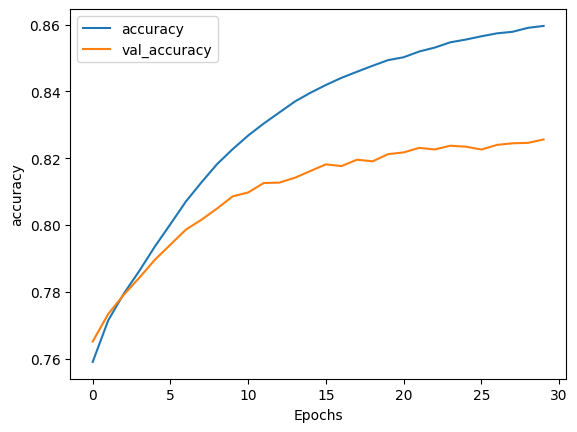

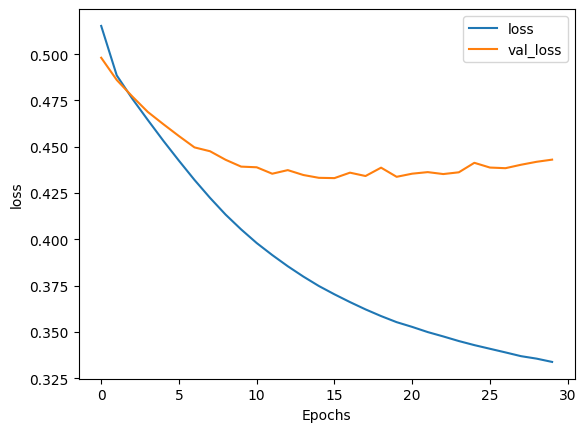

In [71]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_4, 'accuracy')
plot_graphs(lstm_model_3_4, 'loss')

Comment: The "lstm_model_3_4" has a training accuracy of 85.9% and validation accuracy of 82.6%, and the training time is approximate 1032 seconds (around 17 mins). Also, it can pass the validation test. By comparison, this model has a similiar performance whe previous LSTM model "lstm_model_3_3".

## LSTM 3.5 model

In [79]:
# Hyperparameters
embedding_dim = 44 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [80]:
# Build the model
lstm_model_3_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_5.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 44)            22000     
                                                                 
 bidirectional_8 (Bidirectio  (None, 68)               21488     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 64)                4416      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 48,099
Trainable params: 48,099
Non-trainable params: 0
_________________________________________________________________


In [81]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_5 = lstm_model_3_5.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 37s 6ms/step - loss: 0.5168 - accuracy: 0.7579 - val_loss: 0.5009 - val_accuracy: 0.7641
Epoch 2/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4913 - accuracy: 0.7702 - val_loss: 0.4886 - val_accuracy: 0.7726
Epoch 3/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4794 - accuracy: 0.7775 - val_loss: 0.4811 - val_accuracy: 0.7762
Epoch 4/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4695 - accuracy: 0.7837 - val_loss: 0.4730 - val_accuracy: 0.7812
Epoch 5/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4597 - accuracy: 0.7900 - val_loss: 0.4670 - val_accuracy: 0.7864
Epoch 6/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4496 - accuracy: 0.7965 - val_loss: 0.4607 - val_accuracy: 0.7912
Epoch 7/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4397 - accuracy: 0.8026 - val_loss: 0.4548 - val_ac

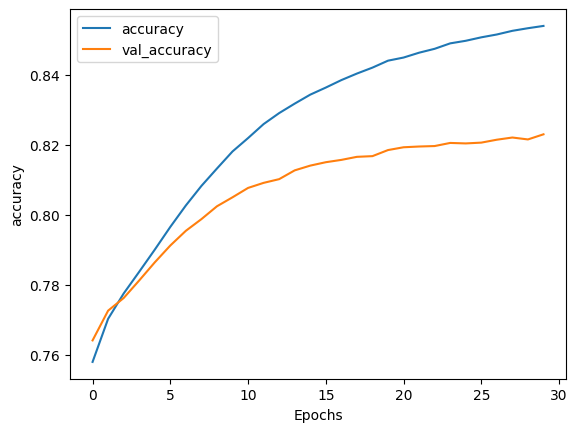

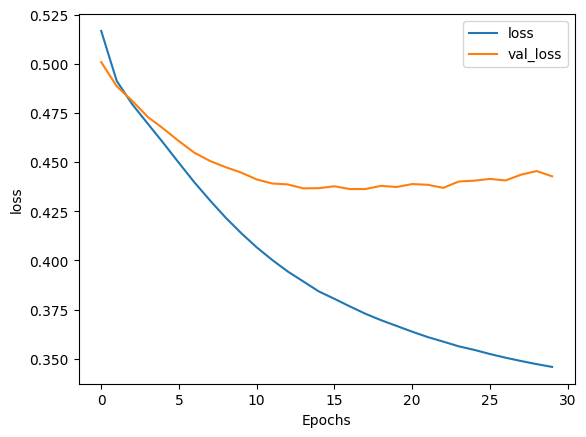

In [83]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_5, 'accuracy')
plot_graphs(lstm_model_3_5, 'loss')

Comment: This model has similar performance when it is compared with  lstm_model_3_4. And the training time has a little deline that is 16 mins in total.  

## LSTM 3.6 model***

In [32]:
# Hyperparameters
embedding_dim = 34 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 64 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [33]:
# Build the model
lstm_model_3_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_6.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 34)            17000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 68)               18768     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                4416      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 40,379
Trainable params: 40,379
Non-trainable params: 0
_________________________________________________________________


In [34]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_6 = lstm_model_3_6.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.5191 - accuracy: 0.7570 - val_loss: 0.5004 - val_accuracy: 0.7644
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4930 - accuracy: 0.7683 - val_loss: 0.4906 - val_accuracy: 0.7684
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4819 - accuracy: 0.7753 - val_loss: 0.4831 - val_accuracy: 0.7750
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4721 - accuracy: 0.7815 - val_loss: 0.4767 - val_accuracy: 0.7782
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4630 - accuracy: 0.7876 - val_loss: 0.4716 - val_accuracy: 0.7842
Epoch 6/30
5654/5654 [==============================] - 37s 6ms/step - loss: 0.4535 - accuracy: 0.7936 - val_loss: 0.4658 - val_accuracy: 0.7856
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4445 - accuracy: 0.7991 - val_loss: 0.4571 - val_ac

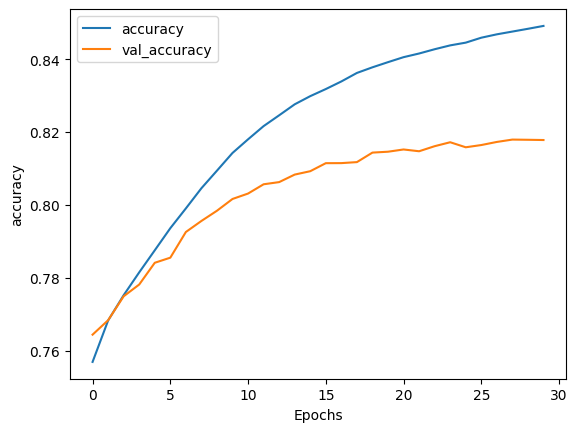

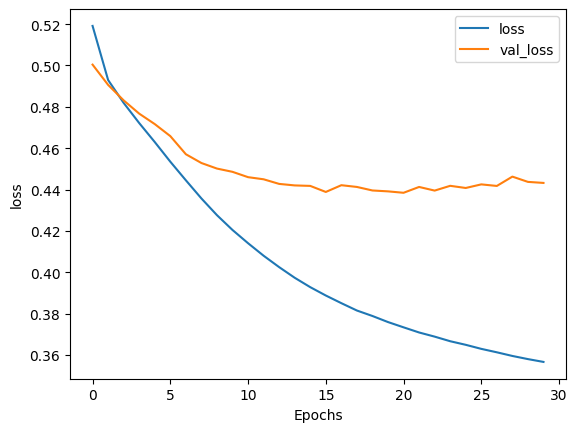

In [37]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_6, 'accuracy')
plot_graphs(lstm_model_3_6 , 'loss')

After decreasing the embedding dimension, it seems that the model performance is declining in terms of the training and validation accuracy. Therefore, the embedding dimension will not be adjusted for lstm_model_3_3.

lstm_model_3_3's hyperparameter and training summary:

1.embedding_dim = 64  
2.lstm_dim = 34  
3.dense_dim = 64  
4.Training accuracy = 86.4%  
5.validation accuracy = 82.7%  
6.Training time = 1056 seconds (around 17 mins)  
7.validation test: PASS


Next. it will adjust the dense_dim hyperparameter to find the best model.

## LSTM 3.7 model

In [88]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 54 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [89]:
# Build the model
lstm_model_3_7 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_7.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 64)            32000     
                                                                 
 bidirectional_10 (Bidirecti  (None, 68)               26928     
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 54)                3726      
                                                                 
 dense_21 (Dense)            (None, 3)                 165       
                                                                 
Total params: 62,819
Trainable params: 62,819
Non-trainable params: 0
_________________________________________________________________


In [90]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_7 = lstm_model_3_6.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 38s 6ms/step - loss: 0.5149 - accuracy: 0.7589 - val_loss: 0.4948 - val_accuracy: 0.7669
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4870 - accuracy: 0.7721 - val_loss: 0.4844 - val_accuracy: 0.7733
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4738 - accuracy: 0.7805 - val_loss: 0.4749 - val_accuracy: 0.7807
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4613 - accuracy: 0.7888 - val_loss: 0.4656 - val_accuracy: 0.7857
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4490 - accuracy: 0.7965 - val_loss: 0.4583 - val_accuracy: 0.7923
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4372 - accuracy: 0.8042 - val_loss: 0.4533 - val_accuracy: 0.7965
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4261 - accuracy: 0.8110 - val_loss: 0.4469 - val_ac

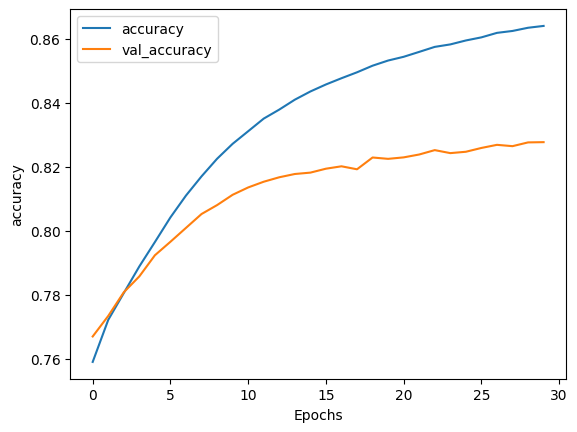

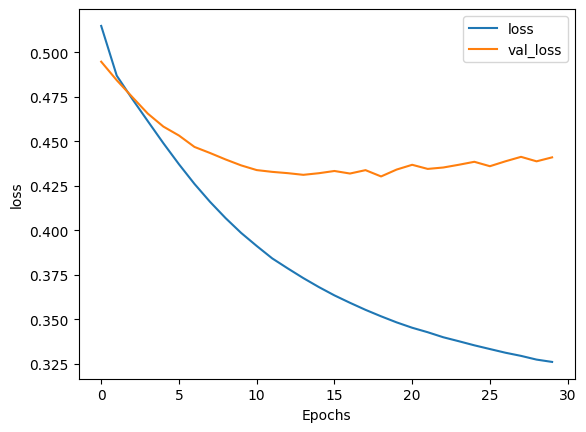

In [91]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_7, 'accuracy')
plot_graphs(lstm_model_3_7, 'loss')

Comment: This model "lstm_model_3_7" has high training accuracy of 86.4% and validation accuracy of 82.8%. It has passed the validation test that no overfitting issue of the model can be identified. The total training time is 1100 seconds (around 18 mins). By comparsion, it has similar accuracy with model "lstm_model_3_3" but 1 min longer training time.

## LSTM 3.8 model 


In [92]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 44 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [93]:
# Build the model
lstm_model_3_8 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_8.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 64)            32000     
                                                                 
 bidirectional_11 (Bidirecti  (None, 68)               26928     
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 44)                3036      
                                                                 
 dense_23 (Dense)            (None, 3)                 135       
                                                                 
Total params: 62,099
Trainable params: 62,099
Non-trainable params: 0
_________________________________________________________________


In [94]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_8 = lstm_model_3_8.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 37s 6ms/step - loss: 0.5150 - accuracy: 0.7582 - val_loss: 0.4969 - val_accuracy: 0.7655
Epoch 2/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4881 - accuracy: 0.7704 - val_loss: 0.4853 - val_accuracy: 0.7719
Epoch 3/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4754 - accuracy: 0.7782 - val_loss: 0.4757 - val_accuracy: 0.7779
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4638 - accuracy: 0.7858 - val_loss: 0.4704 - val_accuracy: 0.7823
Epoch 5/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4521 - accuracy: 0.7935 - val_loss: 0.4619 - val_accuracy: 0.7887
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4408 - accuracy: 0.8005 - val_loss: 0.4549 - val_accuracy: 0.7943
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4302 - accuracy: 0.8076 - val_loss: 0.4491 - val_ac

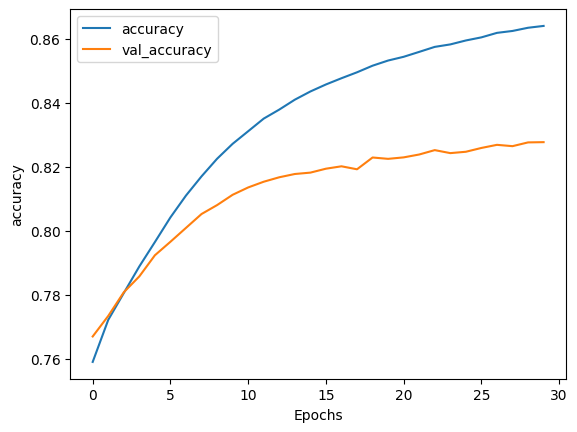

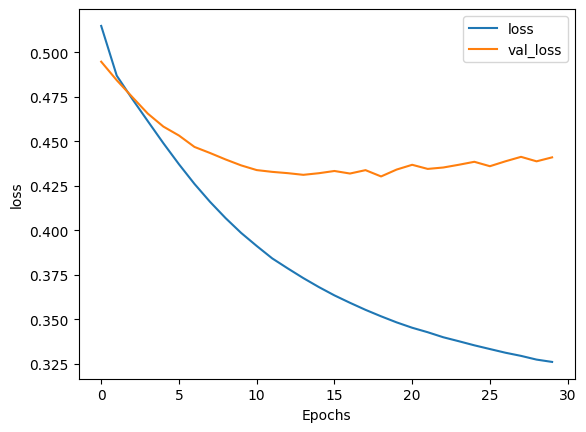

In [95]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_8, 'accuracy')
plot_graphs(lstm_model_3_8, 'loss')

Comment: This model "lstm_model_3_8" has high training accuracy of 86.1% and validation accuracy of 82.6%. It has passed the validation test that no overfitting issue of the model can be identified. The total training time is 1081 seconds (around 18 mins). By comparsion, it has similar accuracy with model "lstm_model_3_3" but 1 min longer training time.

## LSTM 3.9 model

In [14]:
# Hyperparameters
embedding_dim = 64 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 34 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [15]:
# Build the model
lstm_model_3_9 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_9.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_9.summary()

2023-07-12 15:09:29.533093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            32000     
                                                                 
 bidirectional (Bidirectiona  (None, 68)               26928     
 l)                                                              
                                                                 
 dense (Dense)               (None, 34)                2346      
                                                                 
 dense_1 (Dense)             (None, 3)                 105       
                                                                 
Total params: 61,379
Trainable params: 61,379
Non-trainable params: 0
_________________________________________________________________


In [16]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_9 = lstm_model_3_9.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.5143 - accuracy: 0.7587 - val_loss: 0.4965 - val_accuracy: 0.7672
Epoch 2/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4866 - accuracy: 0.7724 - val_loss: 0.4830 - val_accuracy: 0.7748
Epoch 3/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4738 - accuracy: 0.7807 - val_loss: 0.4752 - val_accuracy: 0.7790
Epoch 4/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4623 - accuracy: 0.7882 - val_loss: 0.4708 - val_accuracy: 0.7827
Epoch 5/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4512 - accuracy: 0.7952 - val_loss: 0.4613 - val_accuracy: 0.7904
Epoch 6/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4399 - accuracy: 0.8023 - val_loss: 0.4536 - val_accuracy: 0.7950
Epoch 7/30
5654/5654 [==============================] - 36s 6ms/step - loss: 0.4290 - accuracy: 0.8088 - val_loss: 0.4483 - val_ac

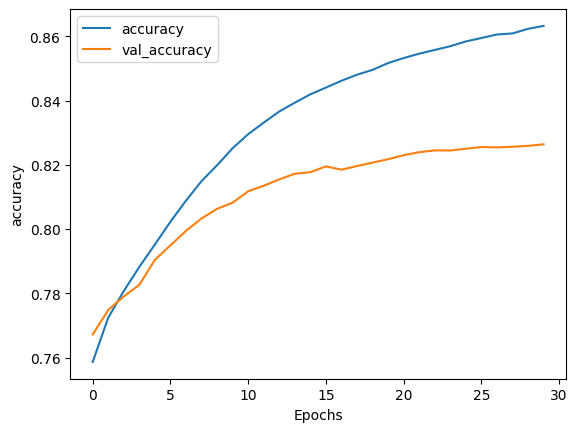

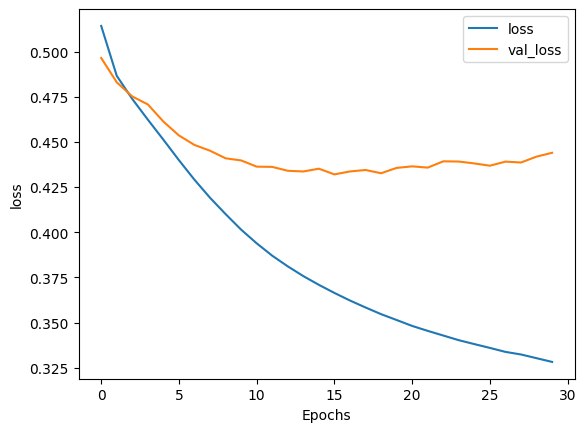

In [17]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_9, 'accuracy')
plot_graphs(lstm_model_3_9, 'loss')

Comment: This model "lstm_model_3_9" has high training accuracy of 86.1% and validation accuracy of 82.6%. It has passed the validation test that no overfitting issue of the model can be identified. The total training time is 1067 seconds (around 17 mins). By comparsion, it has similar accuracy with model "lstm_model_3_3" but a little lower accuacy.

Thus, lstm_model_3_3 is still the best model. Next, it will try to adjust the dense_dim hyperparameter to check if any possible model can replace the lstm_model_3_3.

## LSTM 3.10 model

In [18]:
# Hyperparameters
embedding_dim = 54 # dim of dense vector of word representation
lstm_dim = 54 # nums of LSTM units
dense_dim = 54 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [19]:
# Build the model
lstm_model_3_10 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_10.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 108)              47088     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 54)                5886      
                                                                 
 dense_3 (Dense)             (None, 3)                 165       
                                                                 
Total params: 80,139
Trainable params: 80,139
Non-trainable params: 0
_________________________________________________________________


In [20]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_10 = lstm_model_3_10.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.5157 - accuracy: 0.7581 - val_loss: 0.5015 - val_accuracy: 0.7590
Epoch 2/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4897 - accuracy: 0.7708 - val_loss: 0.4863 - val_accuracy: 0.7727
Epoch 3/30
5654/5654 [==============================] - 51s 9ms/step - loss: 0.4762 - accuracy: 0.7792 - val_loss: 0.4766 - val_accuracy: 0.7797
Epoch 4/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4628 - accuracy: 0.7881 - val_loss: 0.4665 - val_accuracy: 0.7868
Epoch 5/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4486 - accuracy: 0.7970 - val_loss: 0.4572 - val_accuracy: 0.7925
Epoch 6/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4348 - accuracy: 0.8058 - val_loss: 0.4491 - val_accuracy: 0.7988
Epoch 7/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4212 - accuracy: 0.8137 - val_loss: 0.4431 - val_ac

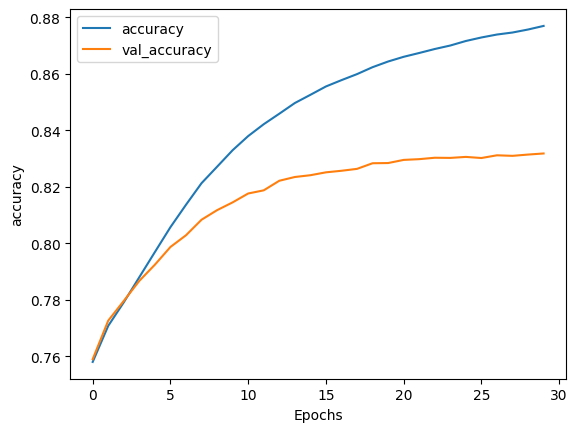

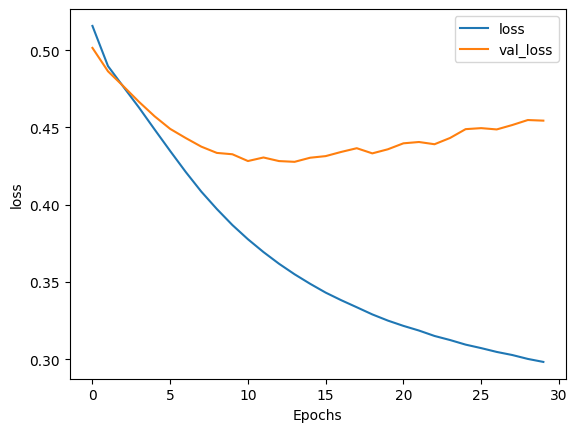

In [21]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_10, 'accuracy')
plot_graphs(lstm_model_3_10, 'loss')

Comment: This model "lstm_model_3_10" has high training accuracy of 87.7% and validation accuracy of 83.2%. It has passed the validation test that no overfitting issue of the model can be identified. The total training time is 1468 seconds (around 24 mins). By comparsion, it has a slightly better accuracy than the model "lstm_model_3_3" but has a longer 7 mins training time.

## LSTM 3.11 model

In [22]:
# Hyperparameters
embedding_dim = 44 # dim of dense vector of word representation
lstm_dim = 44 # nums of LSTM units
dense_dim = 44 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [23]:
# Build the model
lstm_model_3_11 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_11.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 44)            22000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 88)               31328     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 44)                3916      
                                                                 
 dense_5 (Dense)             (None, 3)                 135       
                                                                 
Total params: 57,379
Trainable params: 57,379
Non-trainable params: 0
_________________________________________________________________


In [24]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_11 = lstm_model_3_11.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 44s 7ms/step - loss: 0.5168 - accuracy: 0.7582 - val_loss: 0.4993 - val_accuracy: 0.7650
Epoch 2/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4906 - accuracy: 0.7704 - val_loss: 0.4889 - val_accuracy: 0.7719
Epoch 3/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4787 - accuracy: 0.7785 - val_loss: 0.4804 - val_accuracy: 0.7757
Epoch 4/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4675 - accuracy: 0.7852 - val_loss: 0.4703 - val_accuracy: 0.7836
Epoch 5/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4564 - accuracy: 0.7919 - val_loss: 0.4628 - val_accuracy: 0.7892
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4449 - accuracy: 0.7994 - val_loss: 0.4567 - val_accuracy: 0.7939
Epoch 7/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4337 - accuracy: 0.8064 - val_loss: 0.4510 - val_ac

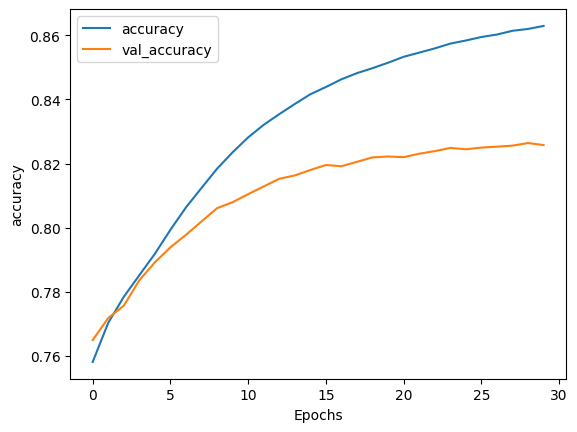

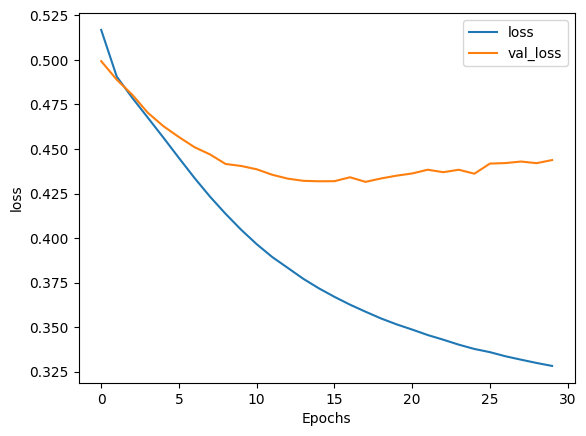

In [25]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_11, 'accuracy')
plot_graphs(lstm_model_3_11, 'loss')

Comment: This model "lstm_model_3_11" has high training accuracy of 86.3% and validation accuracy of 82.6%. It has passed the validation test that no overfitting issue of the model can be identified. The total training time is 1245 seconds (around 20 mins). By comparsion, it has similar accuracy with the model "lstm_model_3_3" but has a longer 3 mins training time.

## LSTM 3.12 model

In [26]:
# Hyperparameters
embedding_dim = 34 # dim of dense vector of word representation
lstm_dim = 34 # nums of LSTM units
dense_dim = 34 # nums of units of intermediate dense layer, a non-linear transformer
maxlen = 10 # length of the the input sequences

In [27]:
# Build the model
lstm_model_3_12 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the training parameters
lstm_model_3_12.compile(loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# Print the model summary
lstm_model_3_12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 34)            17000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 68)               18768     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 34)                2346      
                                                                 
 dense_7 (Dense)             (None, 3)                 105       
                                                                 
Total params: 38,219
Trainable params: 38,219
Non-trainable params: 0
_________________________________________________________________


In [28]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
lstm_model_3_12 = lstm_model_3_12.fit(training_sequences, training_labels_encoded,
                               epochs = NUM_EPOCHS,
                               batch_size = BATCH_SIZE,
                               validation_data = (testing_sequences,
                                                 testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.5193 - accuracy: 0.7568 - val_loss: 0.5008 - val_accuracy: 0.7614
Epoch 2/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4929 - accuracy: 0.7684 - val_loss: 0.4901 - val_accuracy: 0.7704
Epoch 3/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4819 - accuracy: 0.7755 - val_loss: 0.4824 - val_accuracy: 0.7748
Epoch 4/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4724 - accuracy: 0.7815 - val_loss: 0.4765 - val_accuracy: 0.7794
Epoch 5/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4636 - accuracy: 0.7872 - val_loss: 0.4708 - val_accuracy: 0.7846
Epoch 6/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4549 - accuracy: 0.7931 - val_loss: 0.4639 - val_accuracy: 0.7889
Epoch 7/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4466 - accuracy: 0.7985 - val_loss: 0.4603 - val_ac

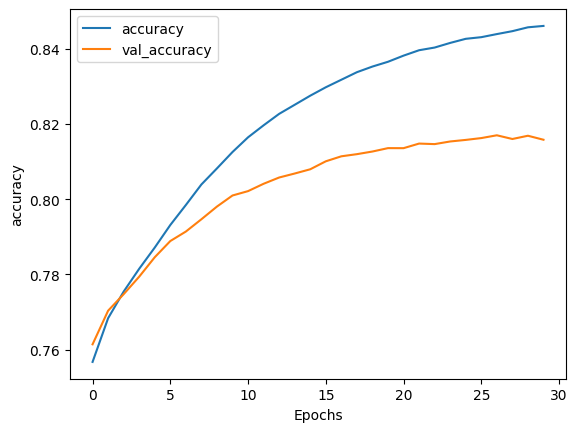

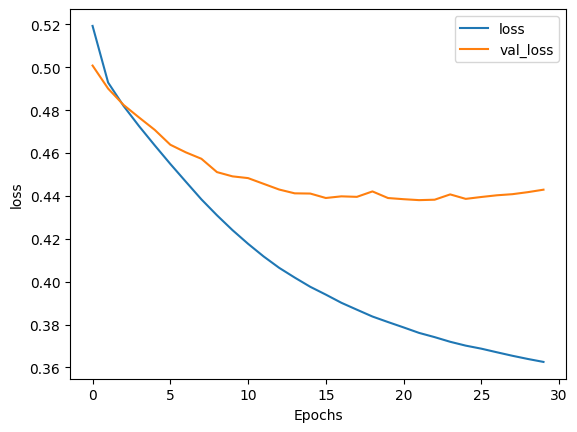

In [29]:
# Visualise the accuracy and validation
plot_graphs(lstm_model_3_12, 'accuracy')
plot_graphs(lstm_model_3_12, 'loss')

Comment: In short, the accuracy of this model lstm_model_3_12 is less than the model ltsm_model_3_3. And the training time is (991 seconds, around 16 mins) 1 min less than the model lstm_model_3_3.

Therefore, the lstm_model_3_3 can be justified as the best LSTM model.

lstm_model_3_3's hyperparameter and training summary:

1. embedding_dim = 64
2. lstm_dim = 34
3. dense_dim = 64
4. Training accuracy = 86.4%
5. validation accuracy = 82.7%
6. Training time = 1056 seconds (around 17 mins)
7. validation test: PASS

Grated Recurrent Units (GRUs) can be viewed as a simplied version of LSTM due to its simplified model structure such as fewer gates, single hidden state. 

The hyperparameter gru_dim specifies the number of units or dimensions in the GRU layer. Similar to the above LSTM layer, it has simplified architecture to learn dependencies in sequential data but it is not effective in capturing very long-term dependencies such as translation and speech recognition.

Remarks: Long-term dependencies can be defined as the relationship between earilier elements and later elements in the sequences. Since LSTM has memeory cells, it allows LSTM models to retain information over longer time than GRU.

# Visalisation 